# EDA

## Data Manipulation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
# Folder where data lies
base_path = 'Processed Data'

data = []

# Walking through the directory structure
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.tif'):
            # root is be something like 'Processed Data/Bubbles'
            # os.path.basename(root) grabs the last part: 'Bubbles'
            
            folder_name = os.path.basename(root)
            
            data.append({'FolderName': folder_name, 'FileName': file})


df = pd.DataFrame(data)

In [3]:
df

,FolderName,FileName
0,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000023_4.tif
1,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000003_1.tif
2,Partial_Copepod,20240514_Erie_WNS096_2mm_Rep1_000014_1.tif
3,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep5_000016_2.tif
4,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep4_000010_2.tif
...,...,...
57091,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000013_50.tif
57092,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000014_65.tif
57093,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep2_000008_42.tif
57094,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep1_000018_95.tif


In [4]:
print(f"Number of unique folders: {df["FolderName"].nunique()}")

Number of unique folders: 33


In [5]:
# Checking file count per folder

df_counts = df.groupby("FolderName", as_index = False).agg(
    file_count = ("FileName", "count")
)

df_counts

,FolderName,file_count
0,149um>,12073
1,Bosminidae,2912
2,Brachionidae,3
3,Bubbles,38
4,Calanoid,416
5,Cladocera,776
6,Conochilus,34
7,Copepoda,455
8,Cyclopoid,1362
9,Daphnia,2401


In [6]:
# Map which shows the hierarchy, separated using "_"
# Map is created by the hierarchy described in the "updated_flowchart.pdf" shared by Dr. Sofia.

hier_map = {
    "Cladocera": "Zooplankton",
    "Rotifer": "Zooplankton",
    "Copepoda": "Zooplankton",
    "Bubble": "Not-Zooplankton",
    "Exoskeleton": "Not-Zooplankton",
    "Fiber": "Not-Zooplankton",
    "Bosminidae": "Cladocera_Zooplankton",
    "Daphnia": "Cladocera_Zooplankton",
    "Nauplius": "Copepoda_Zooplankton",
    "Cyclopoid": "Copepoda_Zooplankton",
    "Harpacticoid": "Copepoda_Zooplankton",
    "Calanoid": "Copepoda_Zooplankton",

}

In [7]:
def assign_levels(folder_name, hier_map):
    """
    Args:
        folder_name: Name of the folder where images are located
        hier_namp: Hierarchy dictionary
    Returns:
        upper_levels_list: list of variable length. It returns all the levels which are above the current level.
    """

    hier_map_keys = [key for key in hier_map.keys()]

    upper_levels = ''
    upper_levels_list = []
    
    for key in hier_map_keys:
        if (any(sub in key.lower() for sub in folder_name.lower().split("_"))) or ((any(sub in folder_name.lower() for sub in key.lower().split("_")))):
            upper_levels = hier_map[key]

            upper_levels_list = upper_levels.split("_")

    return upper_levels_list
    

In [8]:
# Applying the above function to the df

df["LevelList"] = df.apply(lambda x: assign_levels(x.FolderName, hier_map), axis = 1)
df

,FolderName,FileName,LevelList
0,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000023_4.tif,[Zooplankton]
1,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000003_1.tif,[Zooplankton]
2,Partial_Copepod,20240514_Erie_WNS096_2mm_Rep1_000014_1.tif,[Zooplankton]
3,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep5_000016_2.tif,[Zooplankton]
4,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep4_000010_2.tif,[Zooplankton]
...,...,...,...
57091,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000013_50.tif,[]
57092,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000014_65.tif,[]
57093,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep2_000008_42.tif,[]
57094,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep1_000018_95.tif,[]


In [9]:
# Checking if output is right for lower level genes

df[df.FolderName == "Bosminidae"]

,FolderName,FileName,LevelList
53629,Bosminidae,20240514_Erie_WNS096_2mm_Rep2_000006_171.tif,"[Cladocera, Zooplankton]"
53630,Bosminidae,20240514_Erie_WNS096_2mm_Rep4_000015_102.tif,"[Cladocera, Zooplankton]"
53631,Bosminidae,20240430_Erie_WNS0904_2mm_Rep2_000021_171.tif,"[Cladocera, Zooplankton]"
53632,Bosminidae,20240514_Erie_WNS096_2mm_Rep2_000001_7.tif,"[Cladocera, Zooplankton]"
53633,Bosminidae,20240430_Erie_WNS0904_2mm_Rep6_000017_112.tif,"[Cladocera, Zooplankton]"
...,...,...,...
56536,Bosminidae,20240603_Erie_WNS0309_2mm_Rep6_150umSizeFilter...,"[Cladocera, Zooplankton]"
56537,Bosminidae,20240514_Erie_WNS096_2mm_Rep4_000003_189.tif,"[Cladocera, Zooplankton]"
56538,Bosminidae,20240430_Erie_WNS0904_2mm_Rep2_000008_56.tif,"[Cladocera, Zooplankton]"
56539,Bosminidae,20240430_Erie_WNS0904_2mm_Rep2_000021_168.tif,"[Cladocera, Zooplankton]"


In [10]:
# Assigning the levels from the level list

df["Level_1"] = df["LevelList"].apply(lambda x: "" if len(x) < 1 else x[-1])
df["Level_2"] = df["LevelList"].apply(lambda x: "" if len(x) < 2 else x[-2])
df

,FolderName,FileName,LevelList,Level_1,Level_2
0,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000023_4.tif,[Zooplankton],Zooplankton,
1,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000003_1.tif,[Zooplankton],Zooplankton,
2,Partial_Copepod,20240514_Erie_WNS096_2mm_Rep1_000014_1.tif,[Zooplankton],Zooplankton,
3,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep5_000016_2.tif,[Zooplankton],Zooplankton,
4,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep4_000010_2.tif,[Zooplankton],Zooplankton,
...,...,...,...,...,...
57091,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000013_50.tif,[],,
57092,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000014_65.tif,[],,
57093,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep2_000008_42.tif,[],,
57094,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep1_000018_95.tif,[],,


In [11]:
# Dropping LevelList column as it is no longer needed

df.drop(columns=['LevelList'], inplace=True)
df

,FolderName,FileName,Level_1,Level_2
0,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000023_4.tif,Zooplankton,
1,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep1_000003_1.tif,Zooplankton,
2,Partial_Copepod,20240514_Erie_WNS096_2mm_Rep1_000014_1.tif,Zooplankton,
3,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep5_000016_2.tif,Zooplankton,
4,Partial_Copepod,20240430_Erie_WNS0904_2mm_Rep4_000010_2.tif,Zooplankton,
...,...,...,...,...
57091,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000013_50.tif,,
57092,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep4_000014_65.tif,,
57093,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep2_000008_42.tif,,
57094,Plant_Matter,20240430_Erie_WNS0904_2mm_Rep1_000018_95.tif,,


In [12]:
# Checking out a summary, and seeing if everything matches with the pdf provided by Dr. Sofia

df.groupby(["Level_1", "Level_2", "FolderName"]).agg(
    size = ("FileName", "size")
)

size
Level_1         Level_2   FolderName             
                          149um>            12073
                          Brachionidae          3
                          Conochilus           34
                          Debris            14118
                          Duplicates            6
                          Eubosmina           280
                          Kellicottia          30
                          Keratella            46
                          Leptodora             2
                          MultiClass          120
                          Partial_Other        26
                          Phytoplankton        10
                          Plant_Matter        554
                          Ploima                1
                          Trichocerca           1
                          Unknown             775
                          Unknown_Small       920
                          Zooplankton           5
Not-Zooplankton           Bubbles              38
                          Exoskeleton        1123
                          Fiber_Hairlike     5288
                          Fiber_Squiggly     6455
Zooplankton               Cladocera           776
                          Copepoda            455
                          Partial_Copepod      32
                          Rotifer            2056
                Cladocera Bosminidae         2912
                          Daphnia            2401
                          Partial_Daphnia      55
                Copepoda  Calanoid            416
                          Cyclopoid          1362
                          Harpacticoid         15
                          Nauplius_Copepod   4708

In [13]:
df.groupby(["Level_1", "Level_2", "FolderName"]).agg(
    size = ("FileName", "size")
).to_csv('level_wise_image_distribution.csv')

## Visualization

#### Plotting to see the distribution of the images from each folders

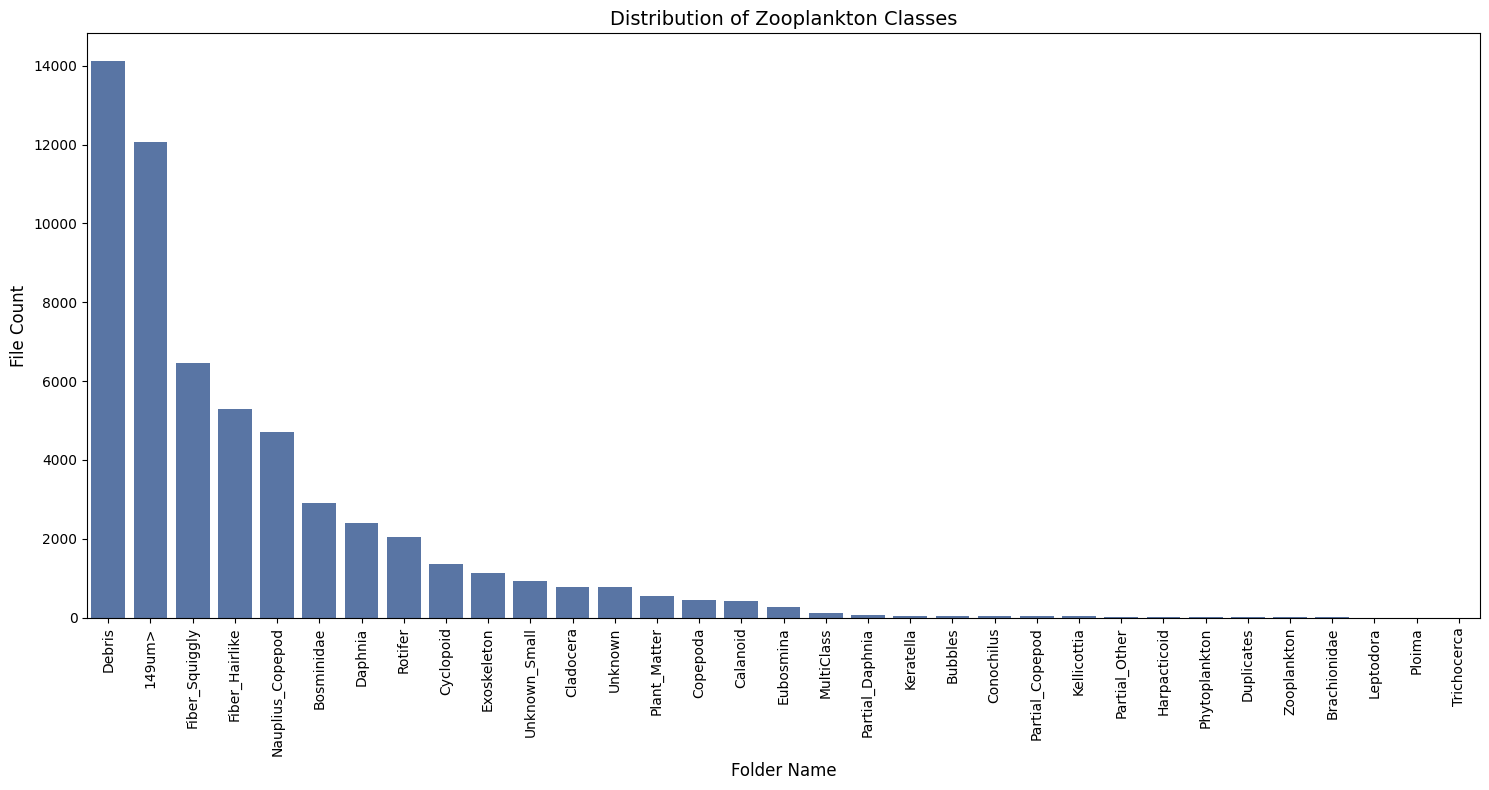

In [13]:
# Plotting to see the distribution of the images from each folders

df_counts = df_counts.sort_values("file_count", ascending=False)



plt.figure(figsize=(15, 8))  # Set figure size (Width, Height)
sns.barplot(data=df_counts, x="FolderName", y="file_count", color="#4c72b0")

plt.xticks(rotation=90)
plt.xlabel("Folder Name", fontsize=12)
plt.ylabel("File Count", fontsize=12)
plt.title("Distribution of Zooplankton Classes", fontsize=14)
plt.tight_layout() 


plt.show()

#### Marking the folder names in red, those of whose hierarchy we know from the "updated_flowchart" pdf


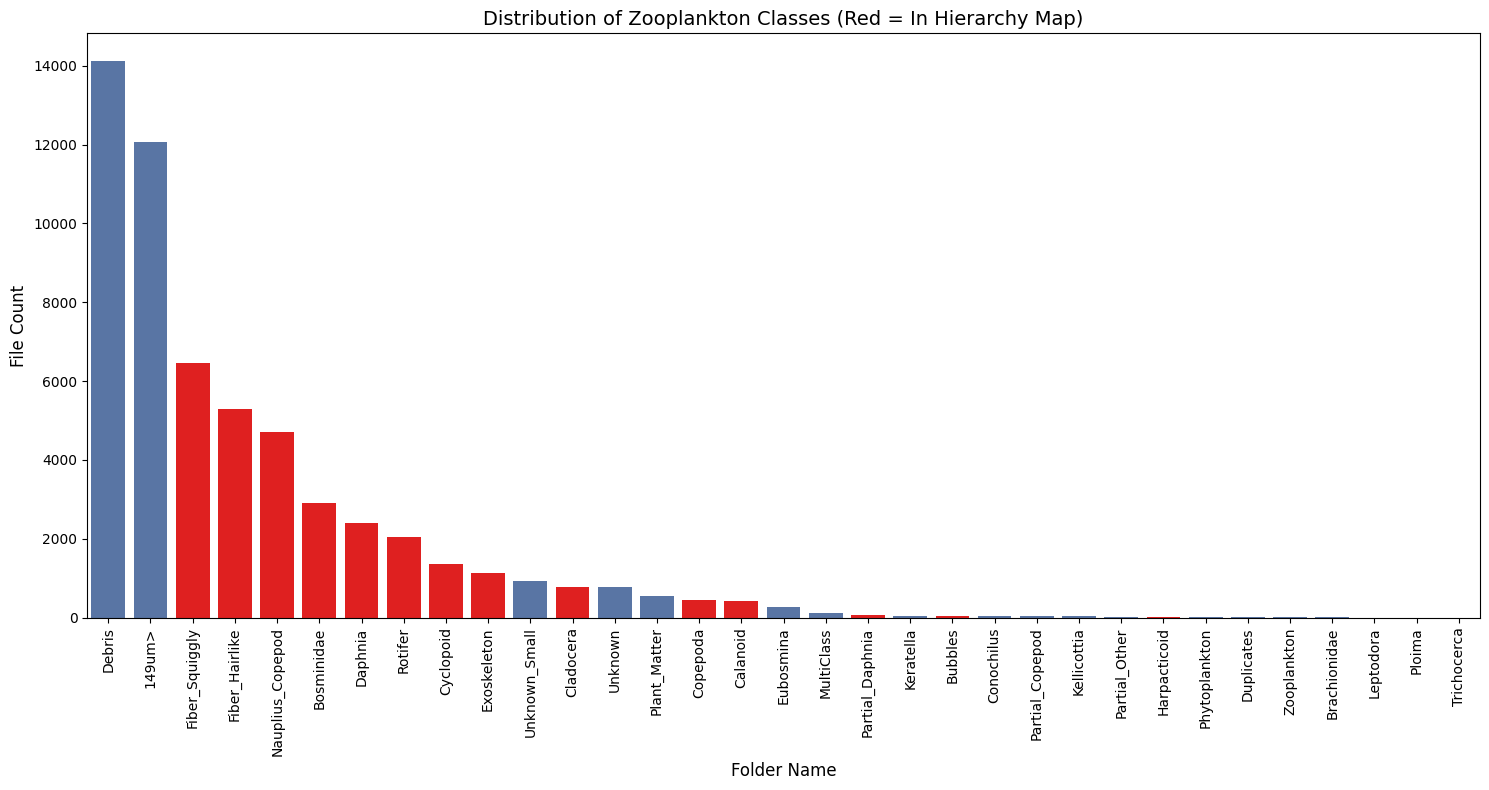

In [14]:
# Marking the folder names in red, those of whose hierarchy we know from the "updated_flowchart" pdf

map_keys = [k.lower() for k in hier_map.keys()]

def get_color(folder_name):

    name_lower = folder_name.lower()
    
    # Checking if any key from the map is a substring of the folder name
    for key in map_keys:
        if key in name_lower:
            return 'red'
    
    # Return default color if no match found
    return '#4c72b0'

# Creating a list of colors corresponding to each row in the sorted dataframe
bar_colors = [get_color(name) for name in df_counts['FolderName']]


plt.figure(figsize=(15, 8))
sns.barplot(
    data=df_counts, 
    x="FolderName", 
    y="file_count", 
    hue="FolderName",
    palette=bar_colors,
    legend=False 
)


plt.xticks(rotation=90)
plt.xlabel("Folder Name", fontsize=12)
plt.ylabel("File Count", fontsize=12)
plt.title("Distribution of Zooplankton Classes (Red = In Hierarchy Map)", fontsize=14)
plt.tight_layout()

plt.show()

#### Plotting only the ones whose hierarchy we know from the "updated_flowchart" pdf

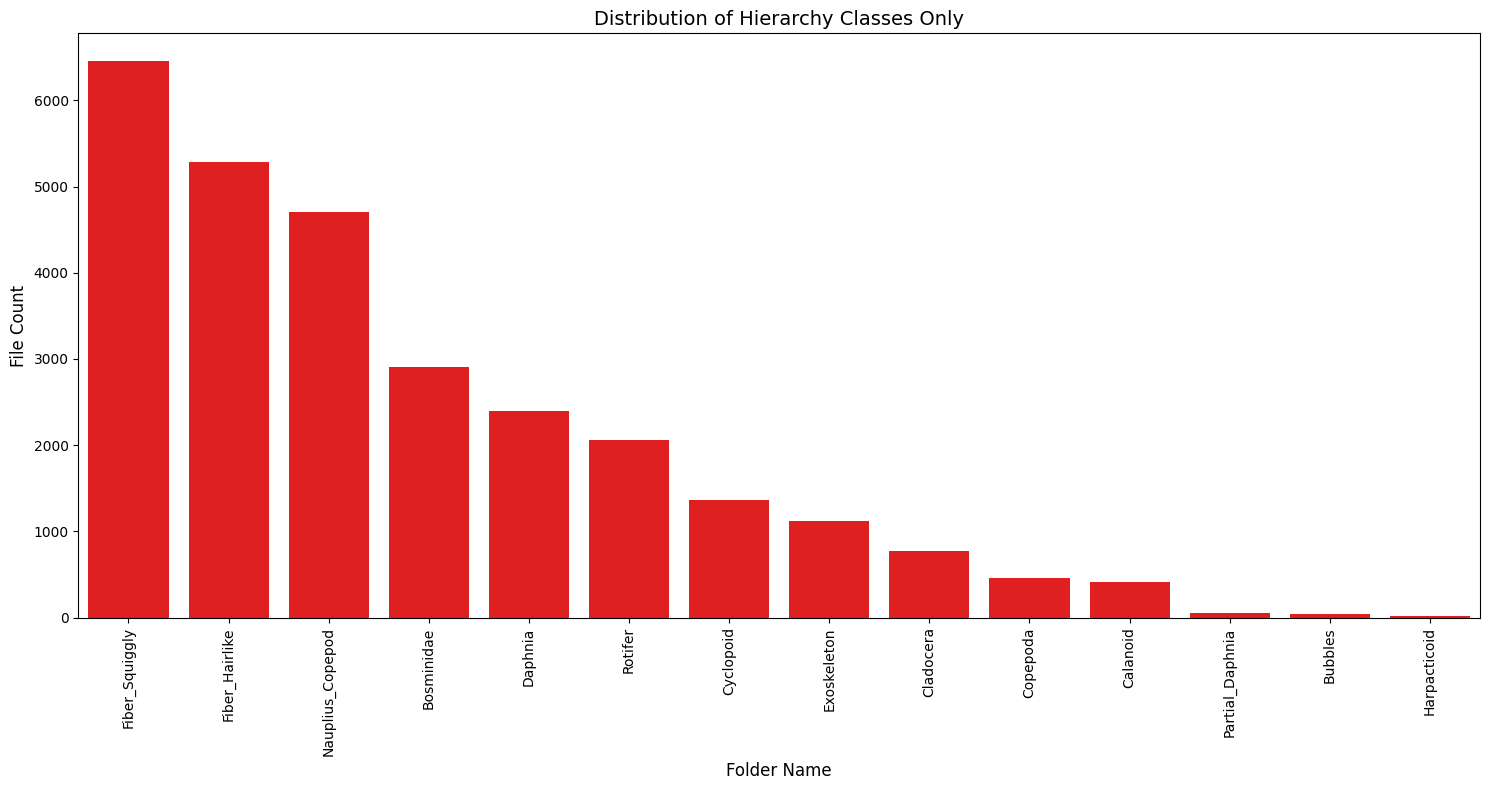

In [15]:
# Plotting only the ones whose hierarchy we know from the "updated_flowchart" pdf

map_keys = [k.lower() for k in hier_map.keys()]

def is_in_hierarchy(folder_name):
    name_lower = folder_name.lower()
    for key in map_keys:
        if key in name_lower:
            return True
    return False


df_red = df_counts[df_counts['FolderName'].apply(is_in_hierarchy)].copy()


df_red = df_red.sort_values("file_count", ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(
    data=df_red, 
    x="FolderName", 
    y="file_count", 
    color="red" 
)


plt.xticks(rotation=90)
plt.xlabel("Folder Name", fontsize=12)
plt.ylabel("File Count", fontsize=12)
plt.title("Distribution of Hierarchy Classes Only", fontsize=14)
plt.tight_layout()

plt.show()

#### Creating a function which displays the image at any given index

In [16]:
# Creating a function which displays the image at any given index

def show_image(index):
    """
    Displays the image at the specified index in the dataframe.
    """

    try:
        row = df.iloc[index]
    except IndexError:
        print(f"Error: Index {index} is out of bounds.")
        return

    folder_name = row['FolderName']
    file_name = row['FileName']


    img_path = os.path.join("Processed Data", folder_name, file_name)


    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Label: {folder_name}\nFile: {file_name}")
        plt.axis('off') 
        plt.show()
    else:
        print(f"File not found at: {img_path}")


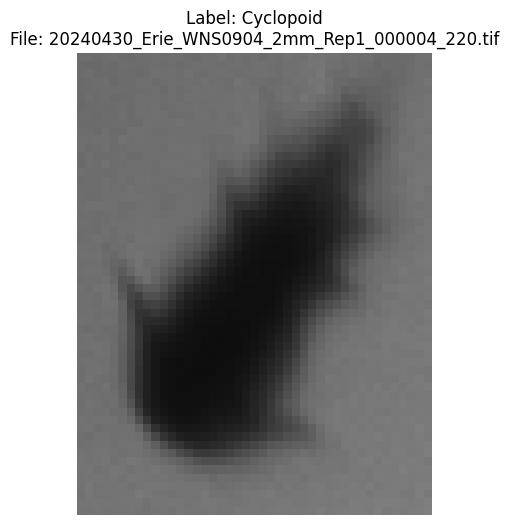

In [17]:
show_image(1253)